<h1>Лабораторная работа № 5</h1>

Импорт необходимых модулей

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataframe_process as my_module
import spacy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from pymystem3 import Mystem
from torch.autograd import Variable

nlp = spacy.load("ru_core_news_md")
stopwords_ru = list(nlp.Defaults.stop_words)

Загрузка обработанных данных

In [87]:
data = pd.read_csv("data.csv", )
data = data.drop("Index", axis=1)
data

,Название,Тип рецензии,Текст рецензии,Количество слов
0,Тьма,0,вчера наконец досматривать тьма сразу сказать ...,667
1,Тьма,0,я писать данный ревивать исключительно потому ...,625
2,Тьма,0,не быть описывать содержание нет смысл сразу к...,527
3,Тьма,0,никогда такой не быть и вот опятьпоминаться в ...,337
4,Тьма,0,о данный сериал я услышать совсем недавно и у ...,817
...,...,...,...,...
1995,1+1,1,начинать с тот что фильм у мы в страна показыв...,306
1996,1+1,1,легкость казаться бы она не мочь быть ни у чел...,307
1997,1+1,1,без всякий предисловие сразу сказать что это х...,349
1998,1+1,1,большинство французский фильм всегда наполнять...,338


Загрузка даныых в датасет из csv файла

In [70]:
data = my_module.create_dataframe("c:\\Users\\Acer\\Documents\\py_lab_2\\annotations_3.csv")
data

,Тип рецензии,Текст рецензии,Количество слов
Тьма,bad,"Вчера, наконец, досмотрела «Тьму». Сразу скажу...",667
Тьма,bad,"Я пишу данное ревью исключительно потому, что ...",625
Тьма,bad,"Не буду описывать содержание, нет смысла. Сраз...",527
Тьма,bad,"Никогда такого не было, и вот опять...\n\n\n\n...",337
Тьма,bad,"О данном сериале я услышал совсем недавно, и у...",817
...,...,...,...
1+1,good,"Начну с того, что фильм у нас в стране показал...",306
1+1,good,"Легкость. Казалось бы, её не может быть ни у ч...",307
1+1,good,"Без всяких предисловий сразу скажу, что это хо...",349
1+1,good,Большинство французский фильмов всегда наполне...,338


Предобработка датафрейма

In [18]:
m = Mystem()
data["Текст рецензии"] = data["Текст рецензии"].apply(my_module.del_trash)
data["Текст рецензии"] = data["Текст рецензии"].apply(m.lemmatize)
data["Текст рецензии"] = data["Текст рецензии"].apply("".join)
data["Текст рецензии"] = data["Текст рецензии"].apply(my_module.del_trash)
change_labels = lambda x: 1 if x=="good" else 0
data["Тип рецензии"] = data["Тип рецензии"].apply(change_labels)
data

KeyboardInterrupt: 

Сохранение обработанного датафрейма в csv файл

In [23]:
#data.to_csv("data.csv")

Векторизация текста

In [86]:
max_words = 10000
cv = CountVectorizer(max_features=max_words, stop_words=stopwords_ru)
sparse_matrix = cv.fit_transform(data["Текст рецензии"]).toarray()
sparse_matrix.shape

TypeError: 'DataLoader' object is not subscriptable

Разделение на тренировочную, валидационную и тестовую выборки

In [88]:
x, x_test, y, y_test = train_test_split(sparse_matrix, np.array(data['Тип рецензии']), test_size=0.2,train_size=0.8)
x_train, x_v, y_train, y_v = train_test_split(x, y, test_size = 0.5, train_size =0.5)

Модель нейронной сети

In [89]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(10000, 100)
        self.linear2 = nn.Linear(100, 20)
        self.linear3 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [90]:
criterion = nn.CrossEntropyLoss()

x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()
x_v = Variable(torch.from_numpy(x_v)).float()
y_v = Variable(torch.from_numpy(y_v)).long()

Цикл обучения

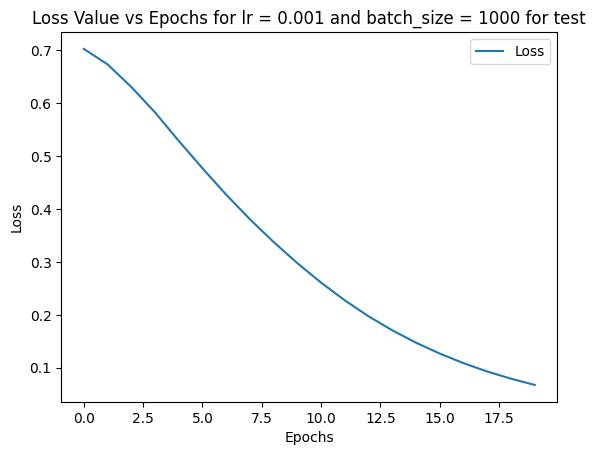

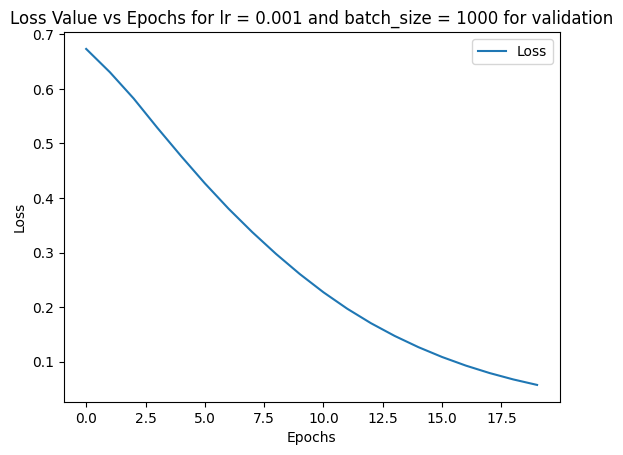

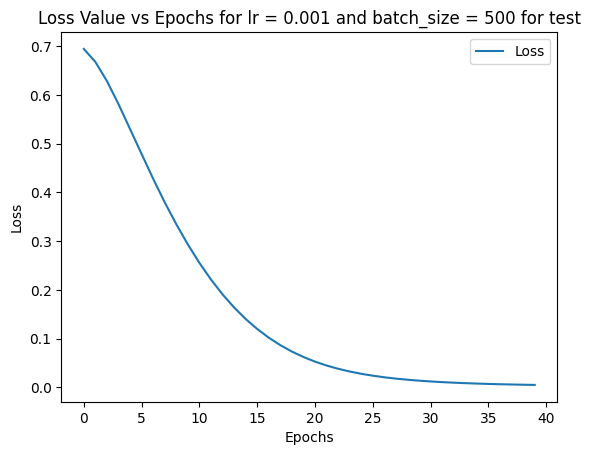

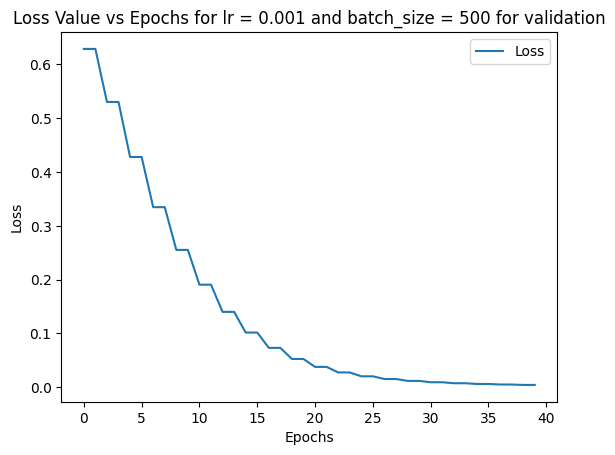

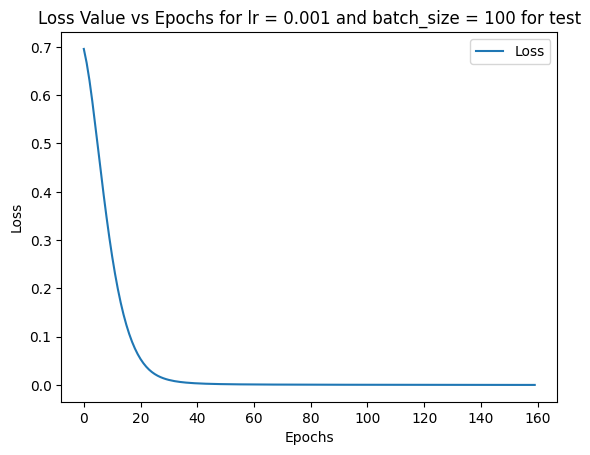

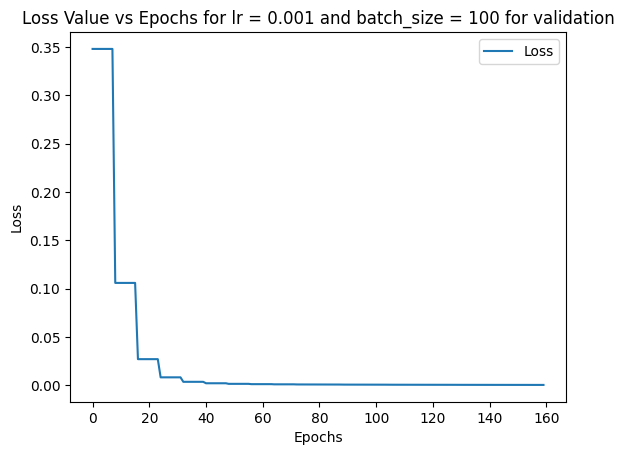

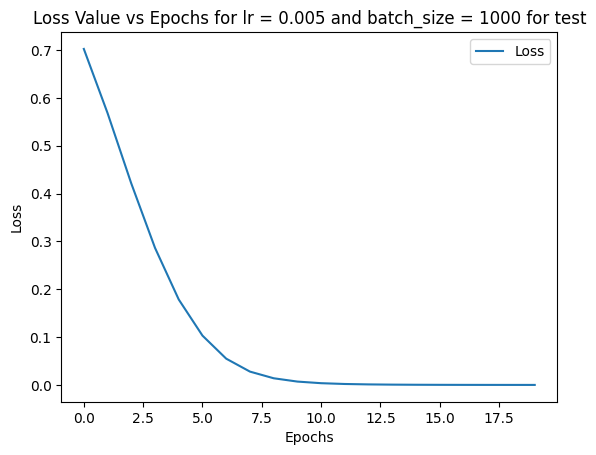

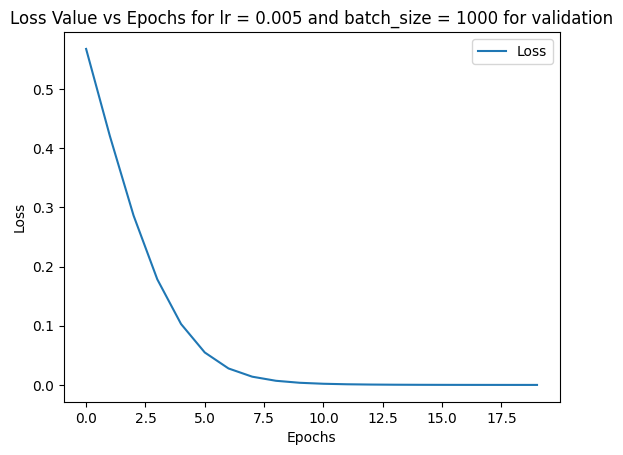

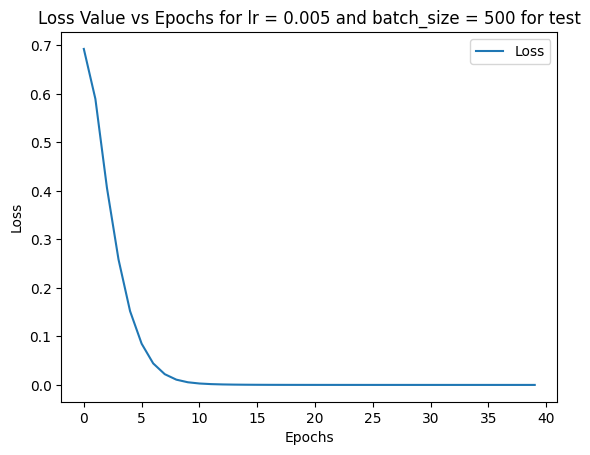

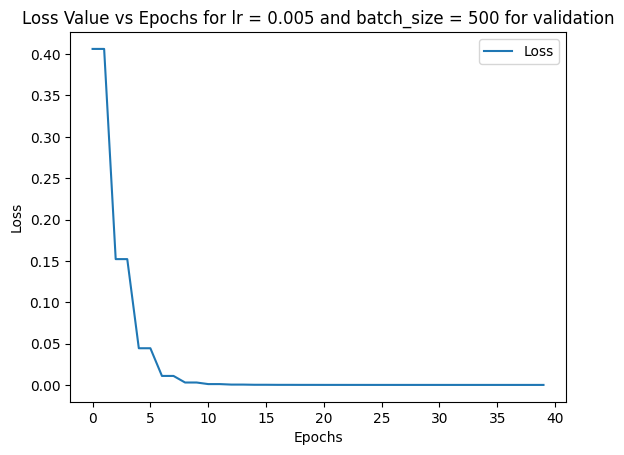

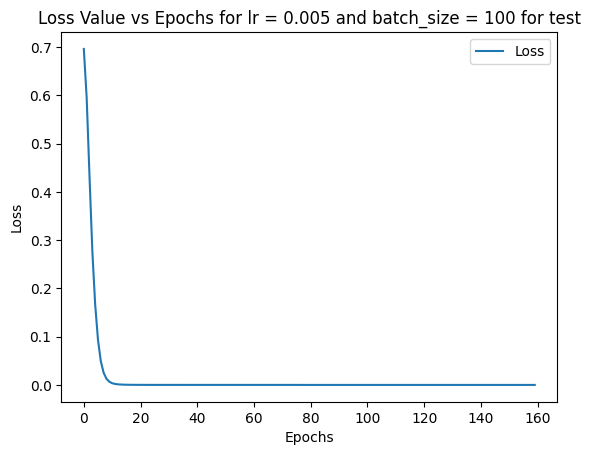

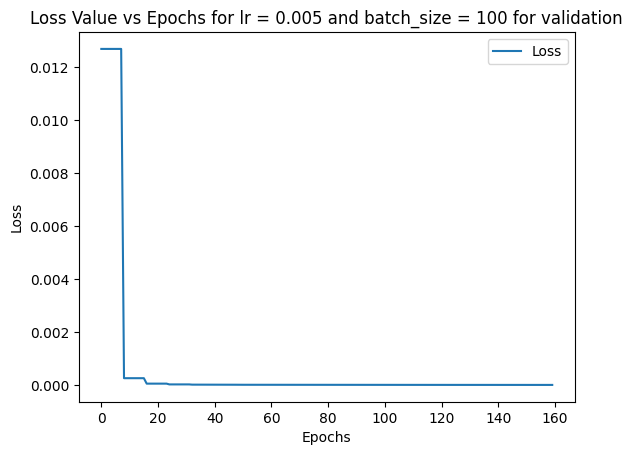

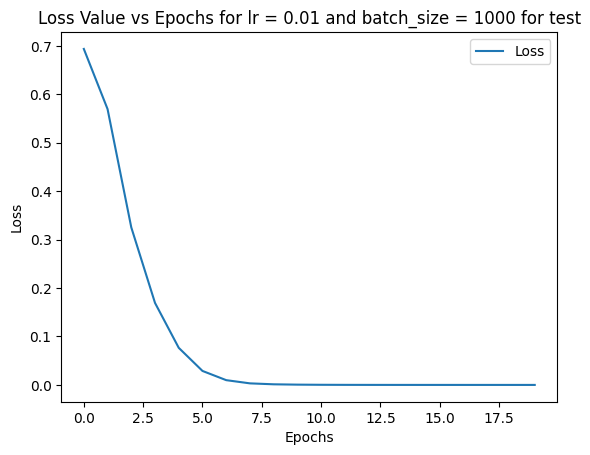

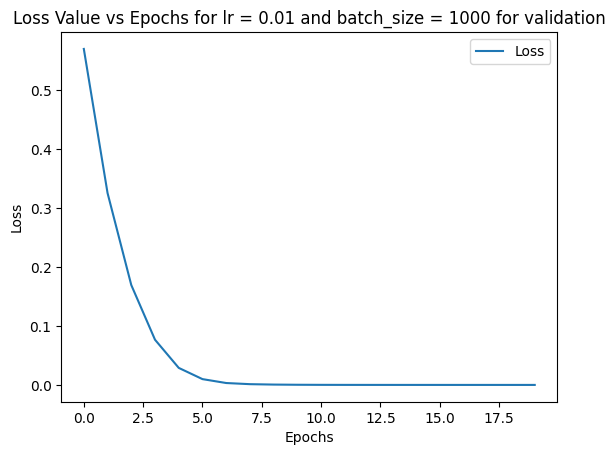

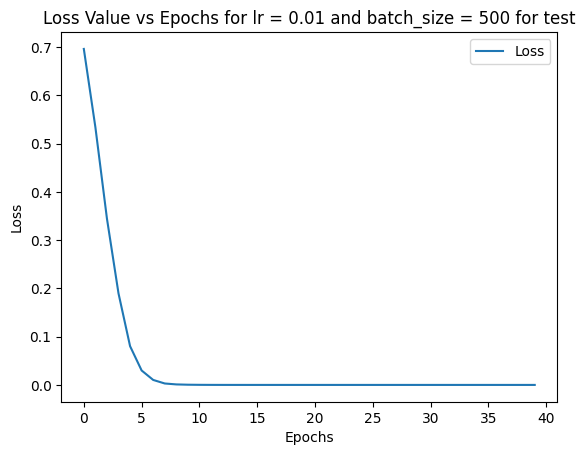

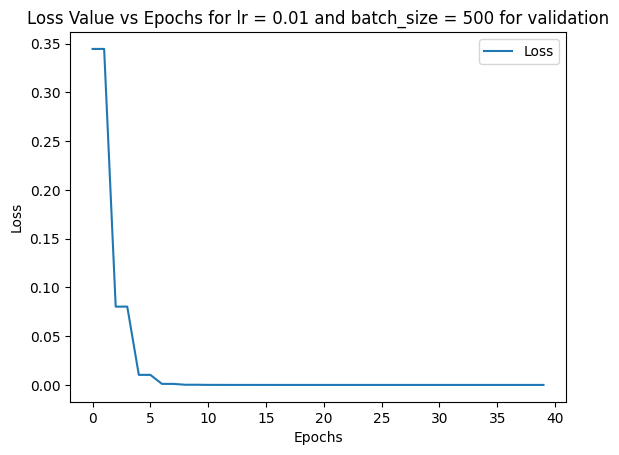

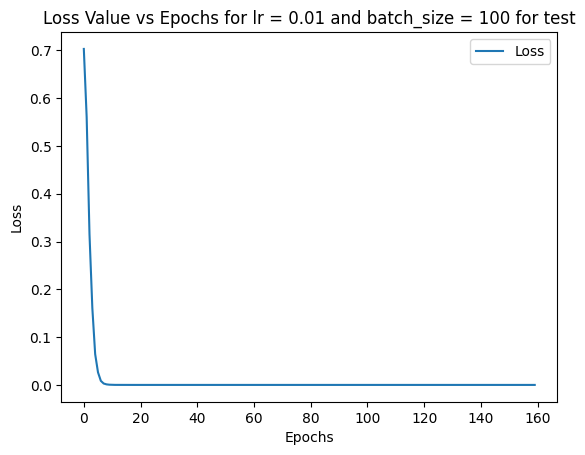

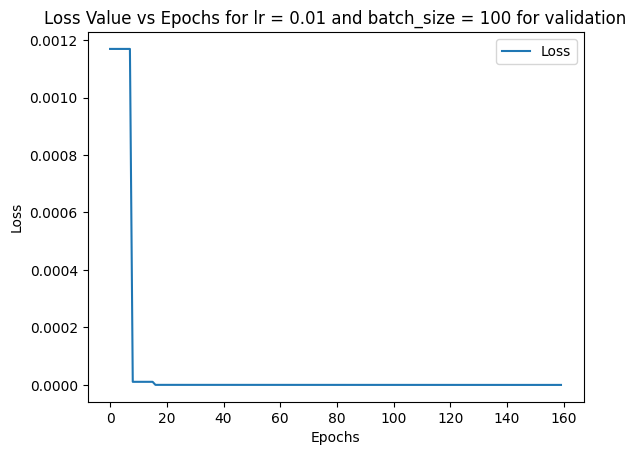

In [97]:
lr_list = [0.001, 0.005, 0.01]
batch_size=[1000, 500, 100]
for lr in lr_list:
  for bs in batch_size:
      model = LogisticRegression()
      data = torch.utils.data.DataLoader(x_train, batch_size=bs, shuffle=True)
      val_data = torch.utils.data.DataLoader(x_v, batch_size=bs, shuffle=True)
      optimizer = torch.optim.Adam(params=model.parameters() , lr=lr)
      epochs = 20
      model.train()
      loss_ = []
      loss_val=[]
      for epoch in range(epochs):
       for elem in data:
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        loss_.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

       model.eval()
       for elem in val_data:
         y_pred = model(x_train)
         loss = criterion(y_pred, y_train)
         loss_val.append(loss.item())

      plt.plot(loss_)
      plt.title(f'Loss Value vs Epochs for lr = {lr} and batch_size = {bs} for test')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend(['Loss'])
      plt.show()


      
      plt.plot(loss_val)
      plt.title(f'Loss Value vs Epochs for lr = {lr} and batch_size = {bs} for validation')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend(['Loss'])
      plt.show()


Проверка точности

In [99]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    loss = criterion(y_pred, y_test)
    pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
    print ("Accuracy : {}%".format(100*pred/len(x_test)))

Accuracy : 85.5%


Сохранение модели

In [59]:
torch.save(model, "c:\\Users\\Acer\\Documents\\py_lab_5\\model")

Загрузка модели

In [60]:
model = torch.load("c:\\Users\\Acer\\Documents\\py_lab_5\\model")
model.eval()

LogisticRegression(
  (linear1): Linear(in_features=10000, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=2, bias=True)
)

Проверка работоспособности модели